In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
os.chdir('..')
import proppy as pp

In [20]:
step_size = 1.0*10**11 # [m]
sphere = 10**14 # [m]
nr_steps = 1*10**4
nr_particles = 2*10**4

### Running diffusion coefficient for $\kappa = 1.5\cdot10^{21}$cm$^2$/s

In [26]:
kappa = 2*10**22
energy = 10**12 # eV
sim = pp.IsotropicSimulation(nr_particles = 10**3, energy = energy, nr_steps = nr_steps, diffusion_coefficient_para = kappa, nr_obs_steps = 600)
%time sim.simulate()

mfp_ios 200133422281521.0
simulate with a diffusion coefficient of  20000000000000000000000 m²/s
start simulation
Propagator initialized
Observer initialized
saved data file isotropic.pkl
CPU times: user 20.9 s, sys: 84 ms, total: 21 s
Wall time: 21.1 s


init statistics plotting class


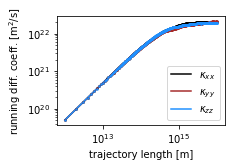

diffusion coefficients computed between 2.18e+15m and 1.00e+16m with 100 data points
kappa_{xx}: 2.03e+22 m²/s +- 4.51e+20 m²/s
kappa_{yy}: 1.93e+22 m²/s +- 1.25e+21 m²/s
kappa_{zz}: 1.9e+22 m²/s +- 5.14e+20 m²/s


In [28]:
df = pd.read_pickle("isotropic.pkl")
sta = pp.Statistics(df)
df_kappas = sta.plot_diffusion_coefficients(n_points_plateau=100)

### Running diffusion coefficient for $\kappa = 1.5\cdot10^{20}$cm$^2$/s

In [29]:
kappa = 1.5*10**20
sim = pp.IsotropicSimulation(nr_particles = 10**3, energy = energy, nr_steps = nr_steps, step_size = 1*10**11, diffusion_coefficient_para = kappa, nr_obs_steps = 600)
%time sim.simulate()

mfp_ios 1501000667111.4077
simulate with a diffusion coefficient of  1.5e+20 m²/s
start simulation
Propagator initialized
Observer initialized
saved data file isotropic.pkl
CPU times: user 21.7 s, sys: 76 ms, total: 21.8 s
Wall time: 21.8 s


init statistics plotting class


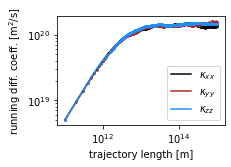

diffusion coefficients computed between 2.18e+14m and 1.00e+15m with 100 data points
kappa_{xx}: 1.35e+20 m²/s +- 4.64e+18 m²/s
kappa_{yy}: 1.48e+20 m²/s +- 7.11e+18 m²/s
kappa_{zz}: 1.48e+20 m²/s +- 2.13e+18 m²/s


In [30]:
df = pd.read_pickle("isotropic.pkl")
sta = pp.Statistics(df)
df_kappas = sta.plot_diffusion_coefficients(n_points_plateau=100)

### Running diffusion coefficient for $\kappa = 1.5\cdot10^{19}$cm$^2$/s

In [31]:
kappa = 1.5*10**19
sim = pp.IsotropicSimulation(nr_particles = 10**3, energy = energy, nr_steps = nr_steps, diffusion_coefficient_para = kappa, nr_obs_steps = 600,  step_size = 1*10**10)
%time sim.simulate()

mfp_ios 150100066711.14075
simulate with a diffusion coefficient of  1.5e+19 m²/s
start simulation
Propagator initialized
Observer initialized
saved data file isotropic.pkl
CPU times: user 26.9 s, sys: 112 ms, total: 27 s
Wall time: 27.1 s


init statistics plotting class


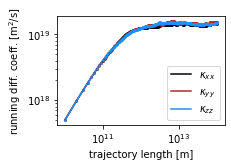

diffusion coefficients computed between 2.18e+13m and 1.00e+14m with 100 data points
kappa_{xx}: 1.4e+19 m²/s +- 3.99e+17 m²/s
kappa_{yy}: 1.46e+19 m²/s +- 4.48e+17 m²/s
kappa_{zz}: 1.43e+19 m²/s +- 2.37e+17 m²/s


In [32]:
df = pd.read_pickle("isotropic.pkl")
sta = pp.Statistics(df)
df_kappas = sta.plot_diffusion_coefficients(n_points_plateau=100)

## Plasmoid simulations with escaping particles

In [9]:
def simulation(diffusion_coefficient):
    sim = pp.Simulation()
    source_pos = np.array([0.0, 0.0, 0.0], dtype=np.float32)
    energy = 10**12 # eV
    radius = sphere
    source = pp.SphereSourceIsotropic(energy, source_pos, nr_particles, radius)
    sim.add_source(source)

    speed_of_light = 3*10**8 # [m/s]
    mfp_iso = 3*diffusion_coefficient/speed_of_light
    mfp = np.array([mfp_iso, mfp_iso, mfp_iso], dtype=np.float32)  # [m]
    propagator = pp.IsotropicPropagator(mfp, nr_steps, step_size)
    sim.add_propagator(propagator)

    substeps = [False, False, True] # observe only steps (no substeps)
    spheres = [sphere]
    observer = pp.SphericalObserver(substeps, spheres, on_detection_deactivate=True)
    sim.add_observer(observer)
    return sim

### For $\kappa = 1.5\cdot10^{21}$cm$^2$/s

In [10]:
diffusion_coefficient = 1.5*10**21 # [m^2/s]
sim = simulation(diffusion_coefficient)

start simulation
Propagator initialized
Observer initialized


In [12]:
%time sim.run_simulation()
sim.save_data('data/data_tut_5_sphere')

CPU times: user 47.6 s, sys: 16.1 ms, total: 47.6 s
Wall time: 47.6 s
saved data file data/data_tut_5_sphere.pkl


### For $\kappa = 1.5\cdot10^{20}$cm$^2$/s

In [14]:
diffusion_coefficient = 1.5*10**20 # [m^2/s]
sim = simulation(diffusion_coefficient)

start simulation
Propagator initialized
Observer initialized


In [15]:
%time sim.run_simulation()
sim.save_data('data/data_tut_5_sphere_20')

CPU times: user 2min 34s, sys: 16.2 ms, total: 2min 34s
Wall time: 2min 34s
saved data file data/data_tut_5_sphere_20.pkl


### For $\kappa = 1.5\cdot10^{19}$cm$^2$/s

In [16]:
diffusion_coefficient = 1.5*10**19 # [m^2/s]
sim = simulation(diffusion_coefficient)

start simulation
Propagator initialized
Observer initialized


In [17]:
%time sim.run_simulation()
sim.save_data('data/data_tut_5_sphere_19')

CPU times: user 3min 56s, sys: 36 ms, total: 3min 56s
Wall time: 3min 56s
saved data file data/data_tut_5_sphere_19.pkl


## Compare the escape times for different diffusion coefficients
The transisitons from the ballistic to the diffusive regime can be apprximated in the above figures of the running diffusion coefficients and plotted in the following comparison plot.

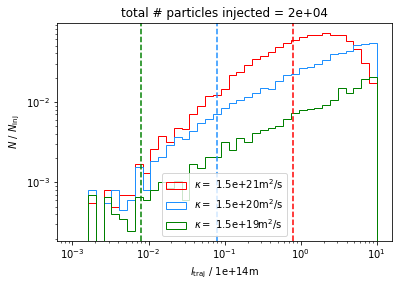

In [18]:
files = ["data/data_tut_5_sphere.pkl", "data/data_tut_5_sphere_20.pkl", "data/data_tut_5_sphere_19.pkl"]
colors = ['r', 'dodgerblue', 'green']
kappas = [1.5*10**21, 1.5*10**20, 1.5*10**19]
transitions = [8*10**13, 8*10**12, 8*10**11]

bins = 40
logbins = np.logspace(np.log10(step_size/sphere),np.log10(step_size*nr_steps/sphere),bins)

for i, file in enumerate(files):
    df = pd.read_pickle(file)
    trajectory_lengths = df['d']
    d = trajectory_lengths/sphere
    weights = np.ones_like(d)/nr_particles
    plt.hist(d, bins=logbins, weights=weights, histtype=u'step', edgecolor=colors[i], linewidth=1., facecolor="None", label='$\kappa=$ {:.1e}m$^2$/s'.format(kappas[i]))
    plt.axvline(x=transitions[i]/sphere, color=colors[i], ls='--')

plt.title('total # particles injected = {:.0e}'.format(nr_particles))
plt.xlabel('$l_\mathrm{traj}$'+' / {:.0e}m'.format(sphere))
plt.ylabel('$N$ / $N_\mathrm{inj}$')
plt.loglog()
plt.legend(loc = "lower center")
plt.savefig('traj_lengths_proppy_normalized.pdf')
plt.show()

The transitions from ballistic to diffusive propagation is evident in this comparison plot, as the slope of the histogram changes from a $N(D) \propto D^1$ to a $N(D) \propto D^{1/2}$ behaviour -> Particles leave the plasmoid slower when they reach the diffusive propagation regime!